In [467]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [345]:
real_estate = pd.read_csv("Data\\realEstate.csv")

In [346]:
land = pd.read_excel("Data\Riyadh_Aqqar.xlsx", sheet_name="Land (الاراضي)")

In [347]:
aqqar_villas2=pd.read_csv("Data\RiyadhVillasAqar.csv")

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\1665608749.py:1: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [348]:
pd.set_option('display.max_rows', None)

### Viewing the dataframe

In [349]:
land.head()

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000


In [350]:
real_estate.head()

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,...,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,"['019065004_1659758037501.jpg', '019065000_165...","['2022-08-06', '03:52:58']",1,1.0,1,...,NaN,NaN,owner,"['2022-03-10', '09:17:01']",4.17,NaN,ابو مصطفى,True,165,False
4,1741562,4498954,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,"['017415629_1657025837185.jpg', '017415620_165...","['2022-08-03', '10:53:47']",1,1.0,1,...,7.0,9.0,normal_marketer,"['2022-07-05', '13:03:54']",4.42,NaN,عقار المستقبل,True,48,False


In [351]:
aqqar_villas2.head(2)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


## 1. Data Profiling:

In [352]:
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [353]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [354]:
aqqar_villas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [355]:
land.shape

(2155, 8)

In [356]:
real_estate.shape

(6762, 30)

In [357]:
aqqar_villas2.shape

(46826, 26)

In [358]:
land.describe()

,المساحة,سعر المتر,السعر الإجمالي
count,2155.000000,2155.000000,2.155000e+03
mean,1568.780510,4356.648574,5.050271e+06
std,9757.996967,35214.809640,3.141799e+07
min,1.000000,90.000000,1.400000e+03
25%,413.000000,1365.000000,7.810000e+05
50%,670.000000,2570.000000,1.442000e+06
75%,900.000000,4000.000000,3.150000e+06
max,299684.000000,945000.000000,8.930250e+08


In [359]:
real_estate.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,onMarket
count,6.762000e+03,6.762000e+03,6762.000000,6762.000000,6760.000000,6762.000000,6.587000e+03,6552.000000,6057.000000,6745.000000,6743.000000,6717.000000,4662.000000,4662.000000,6363.000000,6762.000000
mean,1.325257e+06,4.475689e+06,43274.639899,2.569802,0.990680,2.066105,1.880134e+03,23.141331,2.862968,0.869978,0.722379,0.078160,17.850322,47.169254,4.344400,49.796066
std,8.326004e+05,1.934656e+05,28860.914338,1.117260,0.461318,0.928238,1.369202e+05,13.793542,4.657175,0.336353,0.447859,0.268443,35.434895,1627.623997,0.481803,71.213069
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,5.809750e+05,4.446396e+06,25000.000000,2.000000,1.000000,1.000000,9.800000e+01,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,4.200000,19.000000
50%,1.203756e+06,4.528259e+06,35000.000000,3.000000,1.000000,2.000000,1.450000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,32.000000
75%,2.072661e+06,4.573634e+06,55000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,18.000000,4.560000,61.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,111111.000000,5.000000,2279.000000


In [360]:
aqqar_villas2.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578300


In [361]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [362]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [363]:
aqqar_villas2.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')

#### 1. Reliability:


#### 2. Timeliness: 


#### 3. Consistency: 

#### 4. Relevance: 
there are some columns that are not relevant to us so we can drop them, here they are:
##### real estate (apartments):
- usr id
- id
- refresh 
- last_update
- img
- creation time
- location
- profileImg
- UserName
- **length:** most of them are incorrect, and we already have the area which is more important.
- **width:** most of them are incorrect, and we already have the area which is more important.
**********************************************
##### Aqqar2 (villas):
- Unnamed: 0

In [364]:
land.isna().sum()

نوع العقار         0
الغرض             49
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [365]:
real_estate.isna().sum()

user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
dtype: int64

In [366]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [367]:
real_state_selected_columns = ['title', 'price', 'content', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district',
       'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent']

In [368]:
real_estate.drop(["user_id"],axis=1,inplace=True)
real_estate.drop(["id"],axis=1,inplace=True)
real_estate.drop(["refresh"],axis=1,inplace=True)
real_estate.drop(["last_update"],axis=1,inplace=True)
real_estate.drop(["imgs"],axis=1,inplace=True)
real_estate.drop(["create_time"],axis=1,inplace=True)
real_estate.drop(["location"],axis=1,inplace=True)
real_estate.drop(["profileImg"],axis=1,inplace=True)
real_estate.drop(["UserName"],axis=1,inplace=True)
real_estate.drop(["width"],axis=1,inplace=True)
real_estate.drop(["length"],axis=1,inplace=True)

In [369]:
real_estate.columns

Index(['title', 'price', 'content', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'path', 'district',
       'advertiser_type', 'review', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [370]:
real_estate.head(2)

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.00,True,17,False
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,exclusive_marketer,4.33,True,5,True


In [371]:
aqqar_villas2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [372]:
aqqar_villas2.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [373]:
aqqar_villas2.head(2)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


#### 5. Uniqueness: 


In [374]:
land.duplicated().sum()

259

In [375]:
land[land.duplicated()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
59,أرض,سكني,الرياض,حي الشهداء,جنوبية,320,5300.0,1696000
63,أرض,سكني,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
66,أرض,سكني,الرياض,حي النهضة,غربية,300,3800.0,1140000
69,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,750,3100.0,2325000
114,أرض,تجاري,الرياض,حي الرمال,جنوبية,412,3200.0,1318400


In [376]:
land.drop_duplicates(inplace = True)

In [377]:
land.shape

(1896, 8)

***************************************
Real estate dataframe

In [378]:
real_estate.duplicated().sum()

0

***************************************************
Aqqa_villas2 dataframe

In [379]:
aqqar_villas2.duplicated().sum()

10640

In [380]:
aqqar_villas2.drop_duplicates(inplace=True)

In [381]:
aqqar_villas2.shape

(36186, 25)

In [382]:
aqqar_villas2.duplicated().sum()

0

#### 6. Completeness: 


In [383]:
land.isnull().sum().sort_values(ascending = False)

الغرض             47
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [384]:
land[land['الغرض'].isnull()].head(3)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
319,أرض,NaN,الرياض,حي القادسية,شرقية,543,2650.0,1438950


In [385]:
real_estate.isnull().sum().sort_values(ascending=False)

age                705
review             399
advertiser_type    240
street_width       210
area               175
iam_verified       146
content             94
furnished           45
ac                  19
ketchen             17
livings              2
district             0
onMarket             0
title                0
path                 0
price                0
wc                   0
beds                 0
IsRent               0
dtype: int64

In [386]:
aqqar_villas2.isnull().sum().sort_values(ascending=False)

lounges          855
streetWidth      145
square price       2
price              2
space              0
location           0
neighbourhood      0
basement           0
pool               0
furnihsed          0
elevator           0
maidRoom           0
apartments         0
front              0
duplex             0
rooms              0
outdoorRoom        0
kitchen            0
patio              0
tent               0
driverRoom         0
propertyAge        0
stairs             0
bathrooms          0
garage             0
dtype: int64

### 7. Check Accuracy:


In [473]:
real_estate[real_estate['area'] > 10000000]

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
1729,شقة للإيجار في حي ، شارع الريان ، حي النفل ، ا...,80000,شقة للايجار بمشروع الماجدية حي النفل مكونة من ...,3,1.0,3,11111100.0,5.0,0.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-النفل/حي-شا...,حي النفل,owner,3.8,False,141,False,شمال-الرياض


In [474]:
real_estate = real_estate[real_estate['area'] <= 10000000]

In [480]:
real_estate[real_estate['area'] > 1000]

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
819,شقة للإيجار في شارع ابي موسى الاشعري ، حي الان...,22000,حي الاندلس غرفه صاله وحمام ومطبخ22000 في السن...,1,1.0,1,2040.0,21.0,5.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الاندلس/شارع...,حي الاندلس,exclusive_marketer,4.43,True,7,True,شرق-الرياض
1071,شقة للإيجار في شارع ثابت العوفي ، حي النرجس ، ...,28000,للإيجار عماره شقق عزاب تتكون من12شقه\r\n\r\nتف...,1,1.0,1,1800.0,30.0,0.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-النرجس/شارع...,حي النرجس,exclusive_marketer,4.00,True,200,False,شمال-الرياض
1508,شقة للإيجار في شارع محمد بن القيسي ، حي العارض...,36000,شقة للايجار عوائل مدخل مستقل مع سطح ثلاث غرف و...,3,1.0,2,3125.0,20.0,3.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,exclusive_marketer,5.00,True,5,True,شمال-الرياض
1570,شقة للإيجار في شارع بصيره ، حي طويق ، الرياض ،...,18500,شقه بالدور الثاني في فيلا\r\nمكونه من 4 غرف\r\...,4,1.0,2,18000.0,15.0,17.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/غرب-الرياض/حي-طويق/شارع-بص...,حي طويق,exclusive_marketer,5.00,True,43,True,غرب-الرياض
1829,شقة للإيجار في شارع المحبر ، حي احد ، الرياض ،...,25000,شقه مدخل خاص مقابل الشقه حوش تابع للشقه كهرباء...,2,1.0,2,185600.0,18.0,-1.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/جنوب-الرياض/حي-أحد/شارع-ال...,حي أحد,exclusive_marketer,3.00,True,18,False,جنوب-الرياض
2831,شقة للإيجار في شارع ابي موسى الاشعري ، حي الان...,22000,حي الاندلس غرفه صاله وحمام ومطبخ22000 في السن...,1,1.0,1,2040.0,14.0,3.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الاندلس/شارع...,حي الاندلس,exclusive_marketer,4.43,True,7,True,شرق-الرياض
2970,شقة للإيجار في شارع أبي العباس المحدث ، حي الن...,55000,ا: مكونة من مجلس وصالة وغرفتين نوم ودورتين ميا...,2,2.0,2,3000.0,20.0,5.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-النرجس/شارع...,حي النرجس,normal_marketer,4.28,True,5,True,شمال-الرياض
3127,شقة للإيجار في شارع رقم 423 ، حي المونسية ، ال...,27000,ثلاثه غرف وصاله. في حي المونسيه. \r\n0500892616,3,1.0,2,6400.0,27.0,-1.0,0.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...,حي المونسية,exclusive_marketer,4.36,True,23,True,شرق-الرياض
3215,شقة للإيجار في شارع رقم 199 ، حي الياسمين ، ال...,60000,شقة دورين في عمارة سكنية عوائل\r\n\r\nمجددة با...,4,1.0,4,2450.0,20.0,8.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-الياسمين/شا...,حي الياسمين,exclusive_marketer,4.20,True,23,False,شمال-الرياض
3322,شقة للإيجار في حي السلي ، الرياض ، الرياض,24000,للايجار شقة عزاب \r\nفي حي السلي وحي الخالدية\...,2,1.0,1,1200.0,34.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/جنوب-الرياض/حي-خشم-العان/ح...,حي خشم العان,owner,4.69,True,31,False,جنوب-الرياض


## 2.Data Cleaning

In [387]:
land.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

In [388]:
land['الغرض'].fillna('Unknown', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\4259796565.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [389]:
land['الغرض'].unique()

array(['Unknown', 'سكني', 'تجاري وسكني', 'تجاري'], dtype=object)

In [390]:
land['المدينة'].unique()

array([' امارة منطقة الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ',
       13843, ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

Cleaning المدينة column

In [391]:
land['المدينة'] = land['المدينة'].str.replace('.*الرياض.*', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace('13843', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace('.*حي.*', 'الرياض', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' حريملاء', 'حريملاء', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' رماح', 'رماح', regex=True)
land['المدينة'] = land['المدينة'].str.replace('    الدرعية', 'الدرعية', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' العيينة ', 'العيينة', regex=True)
land['المدينة'] = land['المدينة'].str.replace(' الجبيلة', 'الجبيلة', regex=True)
land['المدينة'] = land['المدينة'].str.replace('الدرعية', 'الدرعية', regex=True)

In [392]:
a = ' الدرعية'
b = 'الدرعية'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [393]:
a = ' الخرج'
b = 'الخرج'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [394]:
a = ' ضرما'
b = 'ضرما'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [395]:
a = 'الجبيلة '
b = 'الجبيلة'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [396]:
land['المدينة'].value_counts()

المدينة
الرياض     1614
حريملاء     230
الدرعية      27
رماح          5
الجبيلة       3
              3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [397]:
land['المدينة'].unique()

array(['الرياض', nan, 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', ' ',
       'ضرما', 'رماح', 'الخرج'], dtype=object)

In [398]:
land['المدينة'].fillna('Unknown', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\807478461.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [399]:
land['المدينة'] = land['المدينة'].map(lambda x : 'Unknown' if x==' ' else x)

In [400]:
land['المدينة'].unique()

array(['الرياض', 'Unknown', 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة',
       'ضرما', 'رماح', 'الخرج'], dtype=object)

Cleaning الحي column

In [401]:
land['الحي'].unique()

array([' الرياض ', ' حي غرناطة ', ' حي اليرموك ', ' حي النسيم الغربي ',
       ' حي الرمال ', ' حي الملك فيصل ', ' حي المعيزلة ', ' حي الشرق ',
       ' حي المونسية ', ' حي الروضة ', ' حي المشرق ', ' حي الخليج ',
       ' حي الشهداء ', ' حي الحمراء ', ' حي البيان ', ' حي قرطبة ',
       ' حي القادسية ', ' حي النهضة ', ' حي الصناعية القديمة ',
       ' حي العلا ', ' حي الجنادرية ', ' حي المعيزيلة ', ' حي السعادة ',
       ' حي النسيم الشرقي ', ' حي خشم العان ', ' حي الصفا ',
       ' حي اشبيلية ', ' طريق سعيد ابن زيد ', ' حي القدس ',
       ' حي الاندلس ', ' حي الشعلة ', ' حي الندوة ', ' حي الفيحاء ', ' ',
       ' امارة منطقة الرياض ', ' حي المنار ', ' حي السلام ',
       ' حي الزاهر ', ' حي الجزيرة ', ' حي النظيم ', ' حي الازدهار ',
       ' حي الملز ', ' حي العارض ', ' حي النرجس ', ' العيينة ',
       ' حي الملقا ', ' حي الغنامية ', ' حي عرقة ', ' حي المهدية ',
       ' حي الدار البيضاء ', ' حي سلطانة ', ' حي الندى ', ' حي ظهرة لبن ',
       ' حي العين ', ' حي حطين ', ' حي الهدا ', '

In [402]:
land['الحي'] = land['الحي'].str.replace('.*الرياض.*', 'Unknown', regex=True)
land['الحي'] = land['الحي'].str.replace('.*شارع.*', 'Unknown', regex=True)
land['الحي'] = land['الحي'].str.replace('.*طريق.*', 'Unknown', regex=True)

In [403]:
land['الحي'] = land['الحي'].map(lambda x : 'Unknown' if x == ' ' else x )

In [404]:
land['الغرض'].value_counts()

الغرض
سكني           1275
تجاري وسكني     404
تجاري           170
Unknown          47
Name: count, dtype: int64

In [405]:
land['الحي'].value_counts()

الحي
Unknown                        567
 حي النرجس                     116
 حي المهدية                    113
 حي ظهرة لبن                    86
 حي الرمال                      66
 حي عريض                        45
 حي العارض                      38
 حي الخير                       38
 حي اليرموك                     35
 حي القادسية                    33
 ضاحية نمار                     28
 العيينة                        26
 حي الروضة                      26
 حي طويق                        22
 حي النسيم الغربي               19
 حي بدر                         18
 حي البيان                      18
 حي القيروان                    17
 حي ضاحية نمار                  17
 حي العوالي                     17
 حي المشرق                      17
 حي المونسية                    17
 حي النهضة                      16
 حي حطين                        16
 حي النظيم                      14
 حي عرقة                        14
 حي الخليج                      14
 حي الشرق                       14
 حي الملقا     

In [406]:
land['الواجهة'].unique().tolist()

['غربية',
 'شمالية',
 'ثلاث شوارع',
 'جنوبية',
 'شرقية',
 'شمالية شرقية',
 'جنوبية شرقية',
 'جنوبية غربية',
 'شمالية غربية',
 'أربع شوارع']

*******************************************
#### real Estate dataframe

In [407]:
real_estate.dtypes

title               object
price                int64
content             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
ketchen            float64
ac                 float64
furnished          float64
path                object
district            object
advertiser_type     object
review             float64
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [408]:
real_estate['livings'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  5.])

In [409]:
real_estate[real_estate['livings'].isnull()]

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent
2923,شقة للإيجار في طريق الملك فهد الفرعي ، حي المؤ...,80000,يوجد شقق استوديو للايجار السنوي فقط في أبراج د...,1,NaN,1,43.0,NaN,0.0,1.0,1.0,1.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-المؤتمرات/ط...,حي المؤتمرات,agent,NaN,True,28,False
5752,شقة للإيجار في شارع وادي السرح ، حي الوادي ، ا...,18000,للايجار غرفة عزابي بعمارة بحي الوادي بالرياض ع...,1,NaN,1,50.0,18.0,6.0,NaN,1.0,NaN,/شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...,حي الوادي,owner,4.23,True,137,False


In [410]:
real_estate['livings'].fillna(-1, inplace=True)


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\2741156563.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [411]:
real_estate['street_width'].unique()

array([ 15.,  30.,  25.,  34.,  39.,  35.,  nan,  18.,  27.,  29.,  20.,
         5.,  21.,  65.,  36.,  37.,  24.,   1.,  33.,  40., 100.,  12.,
        38.,  81.,  28.,  22.,  60.,  45.,  31.,  32.,  11.,  16.,  19.,
        70.,  74.,  26.,  23.,  50.,  14.,  17.,  57.,  56.,  10.,  73.,
        44.,  49.,  76.,  80.,  59.,  51.,  63.,   0.,  53.,  61.,  13.,
        47.,   9.,  52.,  42.,  43.,  75.,  55.,   8.,  46.,  48.,  41.,
        68.,   7.,  58.,  62.,  64.,  71.,  90.,  54.,   6.,  69.,  66.,
        93.,  82.,  77.,  79.,  87.])

In [412]:
real_estate['street_width'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\4254961522.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [413]:
real_estate['street_width'].value_counts()

street_width
 5.0      1111
 20.0      934
 30.0      764
 15.0      684
 36.0      385
-1.0       210
 25.0      178
 35.0      152
 18.0      143
 21.0      142
 16.0      120
 22.0      107
 31.0      103
 40.0       89
 32.0       84
 24.0       82
 19.0       78
 26.0       77
 29.0       77
 28.0       76
 37.0       75
 17.0       74
 23.0       72
 33.0       63
 34.0       60
 39.0       60
 27.0       59
 38.0       53
 50.0       53
 10.0       52
 14.0       47
 60.0       42
 12.0       38
 13.0       27
 100.0      26
 41.0       25
 11.0       22
 1.0        22
 42.0       21
 48.0       19
 45.0       18
 49.0       15
 47.0       15
 43.0       13
 44.0       12
 46.0       12
 54.0       11
 55.0       11
 61.0       11
 56.0       11
 53.0        9
 59.0        9
 8.0         9
 51.0        8
 9.0         8
 70.0        8
 76.0        7
 52.0        7
 58.0        6
 65.0        5
 62.0        5
 68.0        4
 6.0         4
 7.0         4
 0.0         4
 66.0       

In [414]:
real_estate['area'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\3422354964.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [415]:
real_estate['area'].value_counts()

area
 150.0         761
 100.0         471
 200.0         401
 120.0         390
 80.0          308
 180.0         255
 160.0         254
 140.0         239
 1.0           198
 170.0         183
-1.0           175
 50.0          168
 250.0         166
 130.0         164
 90.0          157
 300.0         156
 60.0          148
 70.0          103
 400.0          79
 110.0          77
 40.0           70
 190.0          62
 500.0          50
 30.0           48
 5.0            45
 220.0          44
 175.0          44
 165.0          43
 125.0          41
 450.0          41
 600.0          40
 155.0          38
 75.0           37
 375.0          35
 8.0            35
 166.0          34
 350.0          33
 2.0            29
 145.0          28
 20.0           27
 11.0           26
 25.0           23
 144.0          22
 280.0          19
 85.0           19
 55.0           18
 10.0           17
 208.0          17
 135.0          17
 3.0            16
 143.0          16
 95.0           16
 142.0 

In [416]:
real_estate['content'].unique()

array(['1666 كل شهر',
       'شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r\nعبارة عن \r\nمجلس \r\nصالة \r\nمطبخ \r\nغرفتين نوم \r\n٢ دورة مياه \r\nمطبخ راكب وعداد كهرباء مستقل \r\nللتواصل والمعاينة واتس اب \r\n0555222431\r\n0552222479\r\nمعلن رقم 6681833',
       'شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r\n ثلاث غرف نوم كبيره ودورتين مياه\r\n وصاله كبيره \r\nومجلس\r\nالمساحه  200 م٢\r\n السعر 22\r\n\r\nعبدالله مد ترأس وتساب',
       ...,
       'شقة مؤثثة بالكامل دور اول مجلس وصالة وغرفتين نوم ومطبخ ودورتين مياه.\r\nمطبخ راكب ومكيفات.\r\n عداد كهرباء متصل مع الشقة الأخرى.\r\nالشقة نظيفة وفي مكان رائع بجانب جامع البلوي',
       'عرض رقم 1320\r\n\r\nبسم الله الرحمن الرحيم\r\nالرجاء قراءة الاعلان بشكل واضح\r\nالسلام عليكم ورحمة الله وبركاته\r\n\r\nشقه للايجار دور اول\r\n دفعه 40الف دفعتين 43 الف\r\n\r\nغرفتين وصاله ومجلس 2 دورات مياه \r\nومطبخ \r\nراكب مكيفات ومطبخ \r\nعمرها سنه\r\n\r\nللتواصل عيد\r\n\u202a0558962838\u202c\r\nمؤسسة عثمان العبرة العقارية\r\nخدماتنا :تسويق -ادراة امل

In [417]:
real_estate['content'].fillna('Empty', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\2506601043.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [418]:
real_estate['age'].value_counts()

age
0.0     2754
3.0      544
2.0      544
5.0      450
1.0      448
4.0      431
7.0      145
6.0      142
10.0     123
8.0      102
9.0       73
20.0      43
11.0      34
15.0      34
12.0      30
16.0      17
30.0      16
13.0      16
25.0      15
14.0      12
17.0      11
22.0      11
19.0      10
18.0       8
36.0       6
24.0       5
23.0       5
26.0       5
21.0       4
34.0       4
29.0       4
35.0       4
27.0       3
28.0       2
32.0       1
33.0       1
Name: count, dtype: int64

In [419]:
real_estate['age'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\3829257740.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [420]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [421]:
real_estate['ketchen'].unique()

array([ 1.,  0., nan])

In [422]:
real_estate['ketchen'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\1047363742.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [423]:
real_estate['ac'].unique()

array([ 0.,  1., nan])

In [424]:
real_estate['ac'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\513929238.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [425]:
real_estate['furnished'].unique()

array([ 0.,  1., nan])

In [426]:
real_estate['furnished'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\2258905594.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [427]:
real_estate['advertiser_type'].unique()

array(['owner', 'exclusive_marketer', 'normal_marketer', nan, 'agent'],
      dtype=object)

In [428]:
real_estate['advertiser_type'].fillna('Unknown!', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\3057642781.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [429]:
real_estate['review'].unique()

array([5.  , 4.33, 4.67, 4.17, 4.42, 4.47, 4.54, 3.76, 4.38, 4.79, 4.29,
       4.4 , 4.31,  nan, 2.33, 4.35, 3.94, 4.26, 4.04, 4.56, 1.  , 3.27,
       4.11, 4.34, 4.36, 4.52, 3.5 , 3.98, 4.43, 4.  , 4.09, 3.96, 4.7 ,
       4.59, 4.62, 4.21, 4.05, 4.74, 4.81, 3.67, 4.22, 4.64, 3.73, 4.78,
       3.74, 4.48, 4.39, 4.2 , 4.15, 4.49, 4.69, 4.72, 4.75, 4.57, 4.44,
       4.5 , 4.3 , 3.75, 3.44, 4.14, 4.37, 4.83, 4.25, 4.08, 4.85, 4.1 ,
       3.97, 4.06, 4.45, 3.88, 3.72, 3.83, 4.89, 4.19, 4.46, 4.07, 4.28,
       4.87, 3.38, 4.66, 4.63, 4.55, 3.89, 4.41, 4.58, 4.9 , 3.93, 4.6 ,
       3.86, 4.51, 4.96, 3.99, 4.01, 4.65, 4.93, 3.  , 4.23, 4.71, 4.77,
       4.82, 4.18, 4.68, 3.95, 4.61, 4.27, 4.91, 3.51, 3.82, 4.92, 4.32,
       4.86, 4.12, 4.24, 3.69, 4.16, 3.4 , 3.84, 3.9 , 4.84, 3.77, 3.81,
       3.48, 3.43, 3.64, 4.88, 4.13, 3.87, 3.92, 4.73, 4.76, 3.91, 3.59,
       4.8 , 2.93, 2.  , 4.03, 3.8 , 3.06, 3.68, 3.1 , 4.53, 3.6 , 3.23,
       3.7 , 3.2 , 3.61, 3.63, 3.3 , 3.35, 4.94, 3.

In [430]:
real_estate['review'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\3057692857.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [431]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [432]:
real_estate['iam_verified'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\2585541037.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





****************************
We create new column called location to extract the general location (east, west, north, south of Riyadh) from the path column

In [433]:
real_estate['location'] = real_estate['path'].map(lambda x : x.split('/')[3])

In [434]:
real_estate['location'].unique()

array(['شرق-الرياض', 'شمال-الرياض', 'غرب-الرياض', 'وسط-الرياض',
       'جنوب-الرياض'], dtype=object)

In [435]:
real_estate.isna().sum()

title              0
price              0
content            0
beds               0
livings            0
wc                 0
area               0
street_width       0
age                0
ketchen            0
ac                 0
furnished          0
path               0
district           0
advertiser_type    0
review             0
iam_verified       0
onMarket           0
IsRent             0
location           0
dtype: int64

In [436]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            6762 non-null   object 
 1   price            6762 non-null   int64  
 2   content          6762 non-null   object 
 3   beds             6762 non-null   int64  
 4   livings          6762 non-null   float64
 5   wc               6762 non-null   int64  
 6   area             6762 non-null   float64
 7   street_width     6762 non-null   float64
 8   age              6762 non-null   float64
 9   ketchen          6762 non-null   float64
 10  ac               6762 non-null   float64
 11  furnished        6762 non-null   float64
 12  path             6762 non-null   object 
 13  district         6762 non-null   object 
 14  advertiser_type  6762 non-null   object 
 15  review           6762 non-null   float64
 16  iam_verified     6762 non-null   object 
 17  onMarket      

In [437]:
real_estate.head()

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.00,True,17,False,شرق-الرياض
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,exclusive_marketer,4.33,True,5,True,شرق-الرياض
2,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,3,1.0,2,200.0,25.0,-1.0,0.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,normal_marketer,4.67,True,15,True,شرق-الرياض
3,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,1,1.0,1,120.0,34.0,0.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...,حي العقيق,owner,4.17,True,165,False,شمال-الرياض
4,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,1,1.0,1,60.0,39.0,9.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-التعاون/شار...,حي التعاون,normal_marketer,4.42,True,48,False,شمال-الرياض


***************************************************
#### Aqqar_villas2 dataframe

In [438]:
aqqar_villas2.dtypes

front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [439]:
aqqar_villas2.head(1)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.0


In [440]:
aqqar_villas2['lounges'].unique()

array(['4', '3', '2', '5', '1', nan, '7+'], dtype=object)

In [441]:
aqqar_villas2['lounges'].fillna('-1', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\2944156887.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [442]:
aqqar_villas2['lounges'] = aqqar_villas2['lounges'].map(lambda x : int(x.split('+')[0]))

In [443]:
aqqar_villas2['lounges'].unique()

array([ 4,  3,  2,  5,  1, -1,  7], dtype=int64)

In [444]:
aqqar_villas2['bathrooms'].unique()

array(['5+', '4', '3', '2', '1'], dtype=object)

In [445]:
aqqar_villas2['bathrooms'] = aqqar_villas2['bathrooms'].map(lambda x : int(x.split('+')[0]))

In [446]:
aqqar_villas2['bathrooms'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [447]:
#
aqqar_villas2['apartments'].unique()

array(['0', '2', '3', '1', '4', '7', '6', '30+', '5', '8', '12', '11',
       '9', '15', '16', '13', '23', '10', '14', '20', 2, 1, 0, 4, 3, 5, 8,
       10, 6, 13, 11, 15, 7, 14, 23, 12], dtype=object)

In [448]:
aqqar_villas2['apartments'].isnull().sum()

0

In [449]:
aqqar_villas2['apartments'] = aqqar_villas2['apartments'].map(lambda x : int(x.split('+')[0]) if isinstance(x, str) and '+' in x else int(x))

In [450]:
aqqar_villas2['apartments'].unique()

array([ 0,  2,  3,  1,  4,  7,  6, 30,  5,  8, 12, 11,  9, 15, 16, 13, 23,
       10, 14, 20], dtype=int64)

In [451]:
aqqar_villas2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36186 entries, 0 to 46824
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          36186 non-null  object 
 1   rooms          36186 non-null  int64  
 2   lounges        36186 non-null  int64  
 3   bathrooms      36186 non-null  int64  
 4   streetWidth    36041 non-null  float64
 5   stairs         36186 non-null  int64  
 6   propertyAge    36186 non-null  int64  
 7   driverRoom     36186 non-null  int64  
 8   tent           36186 non-null  int64  
 9   patio          36186 non-null  int64  
 10  kitchen        36186 non-null  int64  
 11  outdoorRoom    36186 non-null  int64  
 12  garage         36186 non-null  int64  
 13  duplex         36186 non-null  int64  
 14  space          36186 non-null  int64  
 15  apartments     36186 non-null  int64  
 16  maidRoom       36186 non-null  int64  
 17  elevator       36186 non-null  int64  
 18  furnihsed  

In [452]:
aqqar_villas2['streetWidth'].isnull().sum()

145

In [453]:
aqqar_villas2['streetWidth'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_18820\1590311053.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [454]:
aqqar_villas2[aqqar_villas2['price'].isnull()]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
253,شرقية,4,1,4,30.0,0,0,0,0,1,...,0,0,0,0,0,0,الشفا,جنوب الرياض,NaN,NaN
9457,شرقية,1,1,3,5.0,0,0,0,1,0,...,0,0,0,0,0,0,طويق,غرب الرياض,NaN,NaN


In [455]:
#a list of the correct neighborhoods in riyadh to match it later with the dataframe 

neighborhoods = [
    "الرمال", "اليرموك", "المونسية", "النهضة", "اشبيلية", "الخليج", "الملز", "الملك فيصل", "النظيم", "قرطبة",
    "السعادة", "الجنادرية", "النسيم الغربي", "الشهداء", "القادسية", "المعيزلة", "الروضة", "السلام", "الفيحاء", "القدس",
    "غرناطة", "الروابي", "الازدهار", "الاندلس", "المنار", "الحمراء", "الريان", "الجزيرة", "الصفا", "الرماية",
    "الملك عبدالعزيز", "النسيم الشرقي", "الندوة", "الملقا", "النرجس", "العارض", "الياسمين", "الصحافة", "العقيق", "القيروان",
    "العليا", "حطين", "السليمانية", "المصيف", "التعاون", "الربيع", "الفلاح", "الوادي", "النزهة", "الملك عبدالله",
    "الندى", "الغدير", "الورود", "الملك فهد", "المروج", "النفل", "الرحمانية", "المرسلات", "النخيل", "الواحة",
    "المغرزات", "المؤتمرات", "المحمدية", "الملك خالد الدولي", "صلاح الدين", "المعذر الشمالي", "بنبان", "جامعة الامام محمد بن سعود الاسلامية", "جامعة الملك سعود", "جامعة الأميرة نورة",
    "مركز الملك عبدالله للدراسات والبحوث", "ظهرة لبن", "طويق", "نمار", "العريجاء الغربية", "المهدية", "الحزم", "السويدي الغربي", "العريجاء الوسطى", "ام الحمام الغربي",
    "الزهرة", "البديعة", "السويدي", "عرقة", "الجرادية", "ظهرة البديعة", "ديراب", "لبن", "الدريهمية", "ام الحمام الشرقي",
    "سلطانة", "شبرا", "الرائد", "الرفيعة", "الفاخرية", "العريجاء", "عليشة", "الخزامى", "الشرفية", "المعذر",
    "الهدا", "صياح", "الناصرية", "العريجاء الأوسط", "الخزامي", "السفارات", "وادي لبن", "العوالي", "ضاحية نمار", "العزيزية",
    "الدار البيضاء", "بدر", "عكاظ", "الشفا", "أحد", "السلي", "المروة", "المناخ", "الحائر", "طيبة",
    "البرية", "المشاعل", "المصانع", "الاسكان", "الدفاع", "المدينة الصناعية الجديدة", "هيت", "عريض", "الضباط", "المربع",
    "غبيرة", "اليمامة", "منفوحة الجديدة", "الشميسي", "منفوحة", "الوزارات", "جرير", "عتيقة", "المنصورة", "الربوة",
    "الزهراء", "ام سليم", "العمل", "الصالحية", "الخالدية", "الوشام", "الديرة", "ثليم", "جبرة", "سكيرينة",
    "الفوطة", "النموذجية", "البطيحا", "الدوبية", "الصناعية", "العود", "الفاروق", "الفيصلية",
     
    "المعيزيلة",
    "أم الحمام الغربي", "البيان", "الخير", "المنصورية", "اسكان وزارة الداخلية", "خشم العان", "عقرباء", "الغنامية", "السلمانية", "الجبيلة",

    "الشرق", "عساكر", "مولى قريش", "احد", "العصامي", "بن خليفه", "الفرضي", "بن مسعود"
]

In [456]:
aqqar_villas2[aqqar_villas2['neighbourhood'].str.len() < 5]['neighbourhood'].unique()

array(['ة ', 'مي ', ' بدر', 'ط ', 'د ', 'صن ', 'رات ', 'ى ', 'مية ', 'ه ',
       'سيه ', 'ري ', 'م ', 'اني ', 'اه ', 'ان ', 'ل ', 'سية ', 'اء ',
       'ذيف ', 'فات ', 'رة ', 'ون ', 'مد ', 'ن ', 'ويه ', 'مة ', 'وس ',
       'فا ', 'ا ', 'اص '], dtype=object)

In [457]:
aqqar_villas2['neighbourhood'] = aqqar_villas2['neighbourhood'].map(lambda x : "Unknown" if len(x) < 5 else x)

In [458]:
aqqar_villas2['neighbourhood'].value_counts()

neighbourhood
 طويق                         5978
 الرمال                       3244
 عكاظ                         2400
 النرجس                       2396
 بدر                          2119
 العارض                       1819
 المونسية                     1506
 الملقا                       1250
 المهدية                      1039
 الحزم                         918
 الياسمين                      859
 النهضة                        799
 ظهرة لبن                      663
 الدار البيضاء                 641
 طيبة                          632
 العزيزية                      494
 القادسية                      474
 اشبيلية                       404
 الخليج                        403
 قرطبة                         377
 اليرموك                       370
 الجنادرية                     313
 مطار الملك خالد الدولي        311
 السويدي                       299
 الشفا                         283
 ديراب                         274
 حطين                          255
 الرمال                        215
 ظهرة 

In [ ]:
def correct_hood(x):
    for hood in neighborhoods:
        if hood in x:
            return hood
        elif x == 'ى الأزدي ':
            return 'الازدهار'
        
    if x != 'Unknown':
        print(x)

In [ ]:
aqqar_villas2['neighbourhood'] = aqqar_villas2['neighbourhood'].map(correct_hood)

م قاضي 
ان بن عبدالله 
ي الدين البغوي 
ى السديد 
ي الدين البغوي 
 الانسي 
ده بن معاويه 
ة بن خليفة الكلبي 
م بن الفرس 
ى بن عبيد 
م قاضي 
 ابو خضير 
ى بن جزلة 
ى المعلمي 
م الحريمي 
ى بن ابراهيم الطالبي 
 أحمد السف 
م الكناني 
م قاضي 
م الحريمي 
م قاضي 
ى المعلمي 
م قاضي 
ي الدين البغوي 
ي الدين البغوي 
ى الطبري 
م قاضي 
ان بن عبدالله 
ى الطائي 
ى السعدي 
ى بن عبيد 
م بن القابلة 
ى المدني 
ى المفتي 
 بن عمر الملتوني 
 كمال 
م بن القابلة 
ى بن عدى 
ى المدني 
ى الانباري 
ى مؤذن 
ى الطبري 
ى بن اكثم 
ى بن اكثم 
م الحريمي 
 الكتاني 
ده بن معاويه 
ي بن عدي 
 الكتاني 
 المرقب 
ي الدين البغوي 
م قاضي 
ى بن عبدالله 
م بن القابلة 
ى بن خالد البرمكي 
ى بن خالد البرمكي 
ى المفتي 
ى الواسطي 
م بن القابلة 
ي الدين البغوي 
ى الصنهاجي 
م قاضي 
ى الانباري 
ى بن يى القرطبي 
ى بن محمد الغرناطي 
ان بن عبدالله 
ى بن قزعة القرشي 
ى الذماري 
م الحريمي 
م قاضي 
ى بن يى القرطبي 
ى الطائي 
ى بن عبدالعزيز 
ى الجفصي 
 الانسي 
م قاضي 
م قاضي 
م قاضي 
ي الدين البغوي 
ى بن أبي بكر 
ى الوراق 
ى بن عبدالعزيز 
ى الزبي

In [ ]:
aqqar_villas2['neighbourhood'].value_counts()

neighbourhood
طويق                    5978
الرمال                  3459
النرجس                  2425
عكاظ                    2410
بدر                     2119
                        ... 
الفرضي                     1
اسكان وزارة الداخلية       1
خشم العان                  1
العمل                      1
الجرادية                   1
Name: count, Length: 149, dtype: int64

In [ ]:
aqqar_villas2['neighbourhood'].isnull().sum()

482

### 1. Univariate Graphical Analysis:


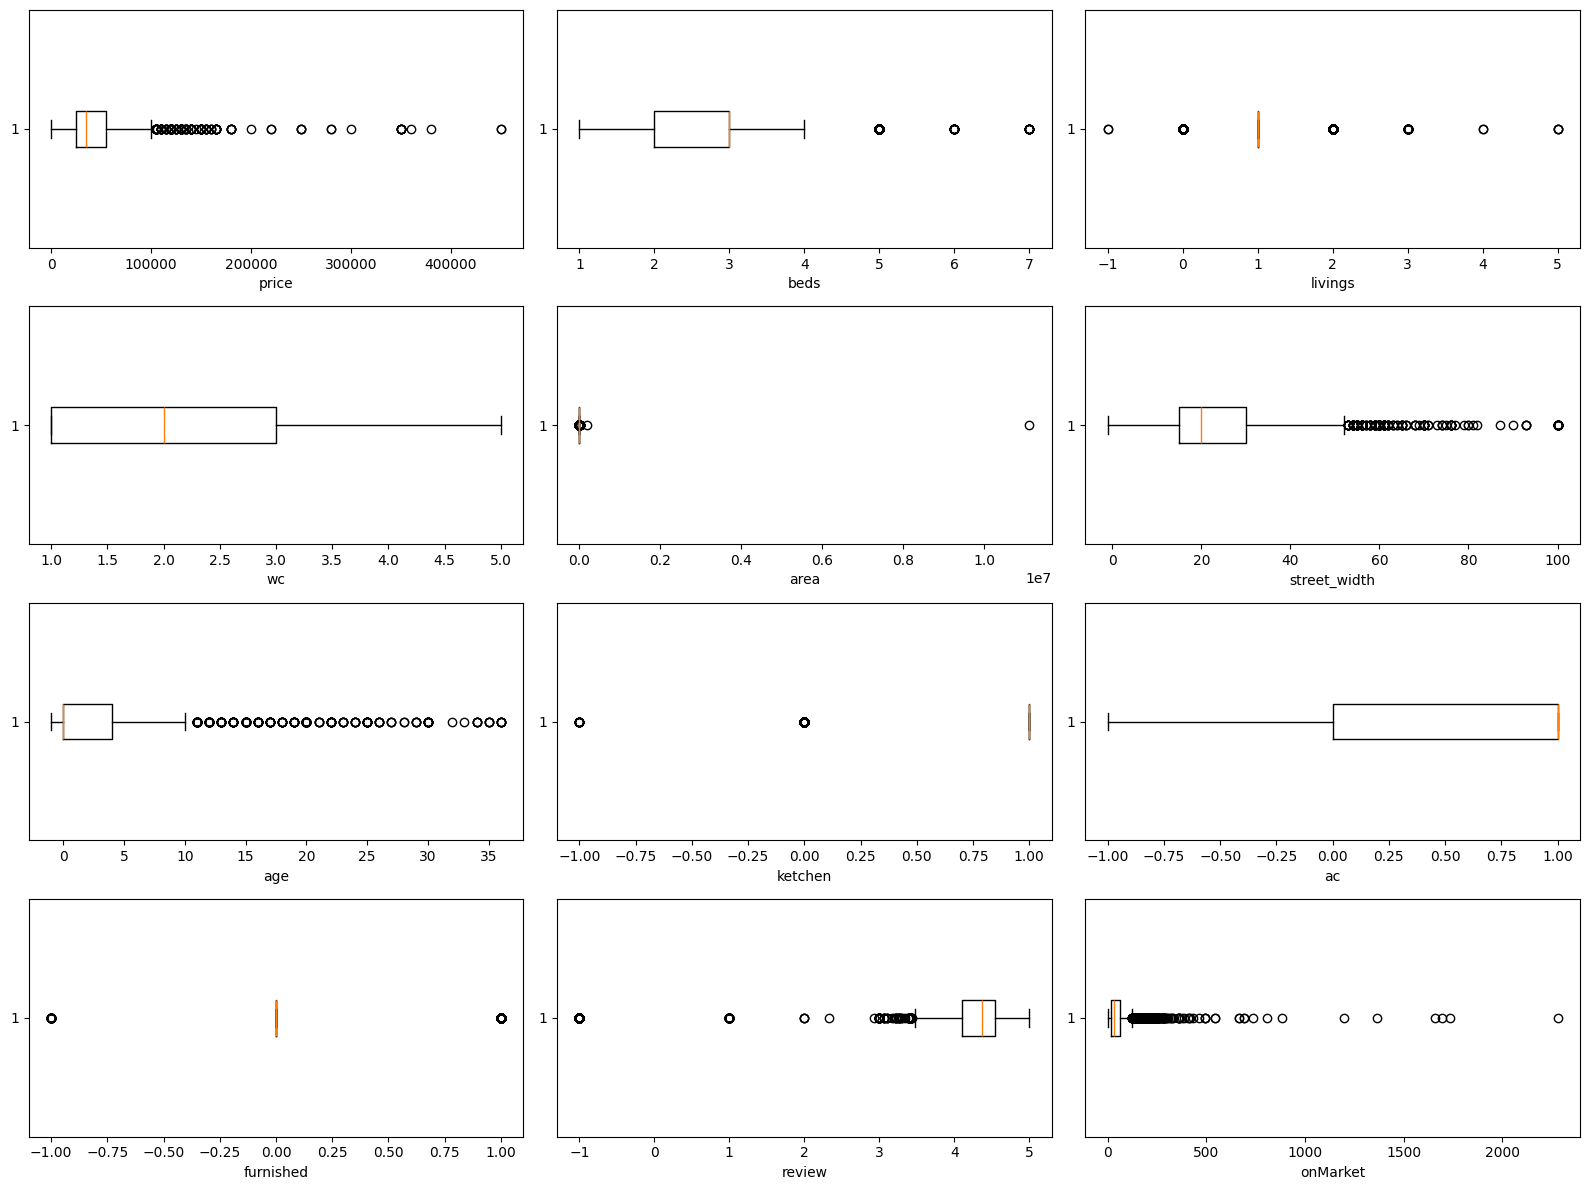

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named real_state
numerical_cols = real_estate.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(real_estate[col], vert=False)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



In [ ]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [ ]:
land_type = land['الغرض'].value_counts()

In [ ]:
fig = px.pie(land_type, values=land_type.values, names=land_type.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

***********************************
#### Real Estate dataframe

In [ ]:
real_estate_location = real_estate['location'].value_counts()

In [ ]:
fig = px.pie(real_estate_location, values=real_estate_location.values, names=real_estate_location.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

In [ ]:
fig = px.histogram(real_estate, x='price', nbins=10, title='')

# Show the histogram
fig.show()

In [464]:
real_estate.head(1)

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.0,True,17,False,شرق-الرياض


In [463]:
real_estate.columns

Index(['title', 'price', 'content', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'path', 'district',
       'advertiser_type', 'review', 'iam_verified', 'onMarket', 'IsRent',
       'location'],
      dtype='object')

In [469]:
real_estate_numric = ['price', 'beds', 'livings', 'wc', 'area', 'street_width', 'age', 'ketchen', 'ac', 'review', 'onMarket']

In [476]:
fig = go.Figure()

# Add a box plot for each column
for col in real_estate_numric:
    fig.add_trace(go.Box(y=real_estate[col], name=col))

# Update layout for better readability
fig.update_layout(title="Box Plots for Each Column",
                  yaxis_title="Values",
                  xaxis_title="Columns",
                  showlegend=False)

# Show the plot
fig.show()

In [477]:
fig = px.box(real_estate, y='price', title='Box Plot of price')

# Show the plot
fig.show()

In [484]:
fig = px.box(
    real_estate,
    y="price",
    color="IsRent",
)


fig.show()

In [481]:
fig = px.box(real_estate, y='area', title='Box Plot of area')

# Show the plot
fig.show()

In [ ]:
real_estate.head(1)

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.0,True,17,False,شرق-الرياض


In [ ]:
price_avg = real_estate[['price', 'location']]

In [ ]:
price_avg =price_avg.groupby('location').mean('price')

In [ ]:
price_avg

,price
location,
جنوب-الرياض,19307.522124
شرق-الرياض,32419.713497
شمال-الرياض,53932.996125
غرب-الرياض,30167.398897
وسط-الرياض,20511.323529


In [ ]:
fig = px.bar(price_avg, x=price_avg.index, y='price', title='Sample Bar Chart', color_discrete_sequence=['#9cdcdd'])

# Show the bar chart
fig.show()

In [486]:
fig = px.box(
    real_estate,
    y="price",
    color="location",
)

fig.update_layout(
    width=1500,
    height=800
)

fig.show()